# Tackle the possibilities to know the maximum reliable value for inclination

Equation (54) of paper:
\begin{equation}
\theta_1\cot\theta_1 = 2\beta I_k(\theta)\cot\theta - \frac{2\beta}{k+2}\left(1-\cos^{k+2}\theta\right)
\end{equation}

$\theta_1$ has no real values for $\theta>\frac{\pi}{2}$, which is likely to be the assymptotic angle $\theta_\infty$. So I proposed a set of solutions

## Check if the bow shock shape beyond $\theta=\frac{\pi}{2}$ is a straight line

Beyond $\frac{\pi}{2}$ we may see the the shadow edge of the stellar wind. If this statement is correct, then
$\theta_{1\infty}=\theta_{1,90}\equiv \theta_1(\frac{\pi}{2})$, which has an analytic solution in the paper.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.insert(0,"../")
from equation6 import Shell

In [2]:
xi=0.8
beta=0.01

In [26]:
shell = Shell(beta=beta,innertype="anisotropic",xi=xi)
theta = np.linspace(0,np.pi)
R = shell.radius(theta)
R[R<=0] = np.nan

In [4]:
th190 = np.sqrt(3*xi*beta/(1+0.2*xi*beta))
m90 = -np.tan(th190)

In [5]:
x,y = R*np.cos(theta),R*np.sin(theta)
x_as = np.linspace(-4,1)
y_as = m90*(x_as-1)

In [6]:
sns.set_context("poster")

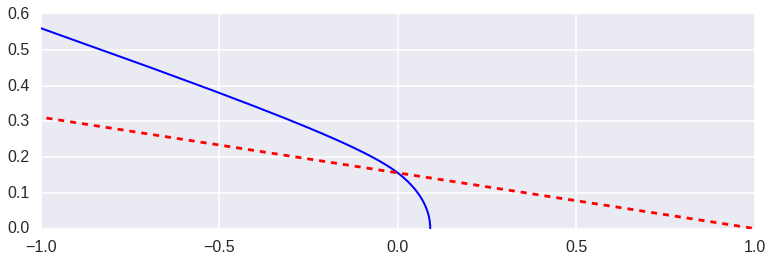

In [15]:
plt.plot(x,y,"b-",lw=2)
plt.plot(x_as,y_as,"r--")
plt.xlim(-1,1)
plt.ylim(0,0.6)
plt.gca().set_aspect("equal")

clearly it is not the case

## Find $\theta$ such that the CRW and the conic equivalent start to diverge

Compute $\alpha = -\frac{dy}{dx}$ for the ellipse and we should stop relying in the conic fit when $\alpha=0$

In [8]:
def A(b, xi):
    """
    Returns the radius of curvature normalized with R0

    Corrected version that also depends on anisotropy index k

    xi = 2/(k+2) => k = 2 (1/xi - 1)
    """
    k = 2*(1./xi - 1.)
    sb = np.sqrt(b)
    c = (1 - b - 9.0*k/4.0)/30.0
    alpha = (1.0 + 2*sb)/6.0 + c/(1 + sb)
    return 1./(1.0-2*alpha)

In [9]:
def theta_c(beta,xi=1.0):
    """
    theta_c defines the excentricity of a given conic
    """
    Acurv = A(beta,xi)
    arg = 2*Acurv - 3*xi*(1.0 + np.sqrt(beta))**2/(1.0 - xi*beta)**2/(1 + 0.2*xi*beta)
    return np.sign(arg)*np.arctan(np.sqrt(np.abs(arg)))

In [10]:
def B(beta,xi=1.0):
    """
    Returns R90 normalized with R0
    """
    return np.sqrt(3*xi*(1.0 + np.sqrt(beta))**2/(1.0 - xi*beta)**2/(1 + 0.2*xi*beta))

In [11]:
R0 = R[0]
a = R0*A(beta,xi)/(2*A(beta,xi)-(B(beta,xi))**2)
b = R0*A(beta,xi)/np.sqrt(2*A(beta,xi)-(B(beta,xi))**2)
x0 = a -R0
t = np.linspace(-np.pi,np.pi)
xe = a*np.cos(t)-x0
ye = b*np.sin(t)

The conversion between t and $\theta$ is
$$\tan\theta = \frac{y}{x} = \frac{b\sin t}{a\cos t -x_0}$$

So, for $\theta$ limit $\theta_{stop}$ we find that
$$\tan\theta_{stop} = -\frac{b}{x_0}$$

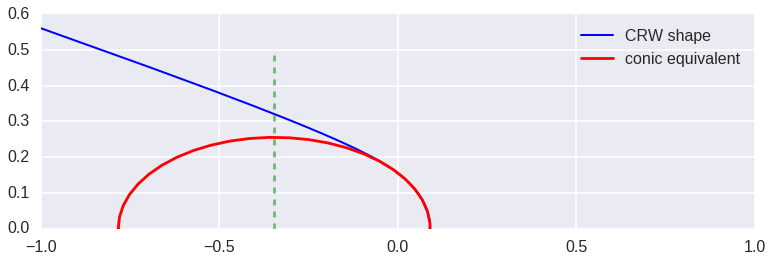

In [30]:
thinfq = np.arctan2(b,-x0)
#Rq = shell.radius(2.5)
#yq = Rq*np.sin(2.5)
plt.plot(x,y,"b-",lw=2,label="CRW shape")
plt.plot(xe,ye,"r-",label="conic equivalent")
plt.plot([-x0,-x0],[0,0.5],"g--",alpha=0.5)
#plt.plot([0.0,-x0],[0.0,yq],"m--")
plt.legend()
plt.xlim(-1,1)
plt.ylim(0,0.6)
plt.gca().set_aspect("equal");

This doesn't lead us to $\theta_\infty$, but to the point we may stop relying in the conic equivalent, which is _before_
$\theta_\infty$